# Matrice de plots

In [1]:
from typing import Any, Callable
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

## `plt.subplots` = la base

### En 2D

On est très souvent amené à faire plusieurs plots pour comparer des résultats. Autant bien les aligner.

Voici le petit "helper" que j'utilise le plus souvent dans mes programmes python.

In [2]:
class AxMatrix:

    @staticmethod
    def subplots(ni: int, nj: int, sharex="col", sharey="row", ax_size=(3, 3)):

        fig, axs = plt.subplots(ni, nj, sharex=sharex, sharey=sharey, figsize=(nj * ax_size[0], ni * ax_size[1]))
        if ni == nj == 1:
            axs = np.array([axs])
        axs: Any = axs.reshape([ni, nj])
        return fig, axs

C'est un très légère amélioration du `subplots`.

* Le résultat est toujours une matrice d'axes (alors que sinon cela dépend de `ni` et `nj`)
* La taille de la figure s'adaptent au nombre d'axes.
* J'ai mis les options de `sharex` et `sharey` qui sont le plus naturel.

***A vous:***

* Quels sont les autres options possibles pour `sharex` et `sharey`
* Complétez le programme de test ci-dessous

In [3]:
def test_2d():
    fns=[(np.sin,"sin"),(np.cos,"cos")]
    freqs=[1,2,3]

    ni=len(fns)
    nj=len(freqs)
    fig,axs=AxMatrix.subplots(ni,nj)
    x=np.linspace(0,2*np.pi,100)
    for i,(fn,fn_name) in enumerate(fns):
        for j,freq in enumerate(freqs):
            axs[i,j].set_title(...
            axs[i,j].plot(...
    fig.tight_layout()
    plt.show()

test_2d()

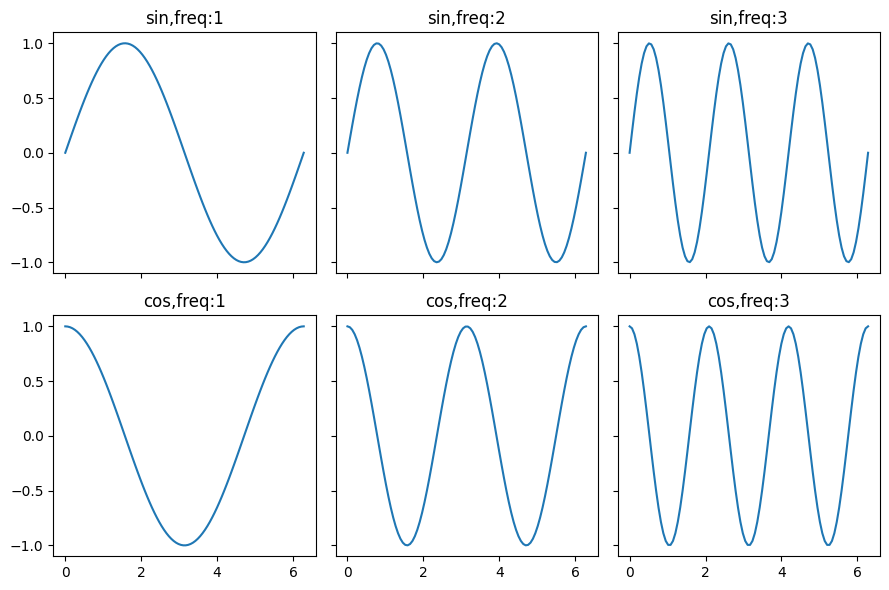

In [3]:
#--- To keep following outputs, do not run this cell! ---

### En 3d

La syntaxe pour créer des axes 3d est difficile à retenir. Se créer un helper sera d'autant plus important:

In [4]:
class AxMatrix:

    @staticmethod
    def subplots_3d(ni, nj, ax_size=(3, 3)):
        fig = plt.figure(figsize=(nj * ax_size[0], ni * ax_size[1]))
        axs = []
        for ij in range(ni * nj):
            axs.append(fig.add_subplot(ni, nj, ij + 1, projection="3d"))
        axs: Any = np.array(axs).reshape([ni, nj])
        return fig, axs

In [5]:
def test_3d():
    ni=2
    nj=3
    fig,axs=AxMatrix.subplots_3d(2,3)
    x=np.linspace(0,1,10)
    X,Y=np.meshgrid(x,x)
    for i in range(ni):
        for j in range(nj):
            axs[i,j].plot_surface(X,Y,X+Y)
    fig.tight_layout(pad=3)
    plt.show()

test_3d()

***A vous:***

* faite un programme de test un peu plus sympa
* Regrouper les 2 helpers précédent:


        class AxMatrix:

            @staticmethod
            def subplots(ni: int, nj: int, sharex="col", sharey="row", ax_size=(3, 3)):
                ...
            
            @staticmethod
            def subplots_3d(ni, nj, ax_size=(3, 3)):
                ...



Copier-coller le résultat dans votre IDE préféré (VS-code / Pycharm / ...). Personnalisez à souhait.

## `AxesGrid`

Une extension qui permet de faire des choses impossible à faire avec le simple `subplots`.

* Les gaphiques partagent la même échelle verticallement et horizontalle
* avec `aspect=True` l'échelle des abcisses est la même que celle des ordonnée (c'est l'équivalent de `ax.set_aspect('equal')`)
* Pour les imshow, on peut facilement positionner les colorbar
* Attention, `AxesGrid` produit toujours un vecteur d'axes (que perso je transforme toujours en matrice pour faire comme avec `plt.subplots`).

### Pour des graphiques alignés avec la même échelle en abscisse et en ordonnée

In [6]:
from mpl_toolkits.axes_grid1 import AxesGrid

x=np.linspace(0.001,1,1000)

ni=3
nj=2

fig=plt.figure(1,figsize=(nj*3,ni*3))
grid=AxesGrid(fig,111,nrows_ncols=(ni,nj),axes_pad=0,aspect=True)


for i in range(ni):
    for j in range(nj):
        grid[i*nj+j].plot(x,x**(i+1)+j)

### Pour bien mettre les colorbar

In [7]:
ni=6
nj=2

fig=plt.figure(1,figsize=(nj*3,ni*3))
grid=AxesGrid(fig,111,nrows_ncols=(ni,nj),
                    axes_pad=0.2,
                    label_mode="L",
                    share_all=True,
                    cbar_location="right",
                    cbar_mode="edge",
                    cbar_size="4%",
                    cbar_pad="0%")


x=np.linspace(-2+i,1,100)
xx,yy=np.meshgrid(x,x)


for i in range(ni):
    signal=(i+1)*np.sin((i+1)*xx)*np.cos((i+1)*yy+j)
    signal_noisy=signal+np.random.normal(size=signal.shape)
    signal_both=np.stack([signal,signal_noisy])
    mini,maxi=np.min(signal_both),np.max(signal_both)

    #pour éviter de réécrire les même choses, on utilise un dictionnaire que l'on passe en argument avec **kwarg
    kwarg={"vmin":mini,"vmax":maxi,'extent':[0,i+1,0,i+1]}
    grid[2*i].imshow(signal,**kwarg)
    im=grid[2*i+1].imshow(signal_noisy,**kwarg)

    grid.cbar_axes[i].colorbar(im)

On avait l'exigence suivante pour ce dessin:

Les graphiques alignées devait partageaient la même colorbar.Il fallait donc imposer une vmin et une vmax.

### Un troisième helper

J'ai ajouté ceci à mon `AxMatrix`. C'est pour tracer des graphiques qui partagent tous la même échelle de couleur.  

In [10]:
class AxMatrix:


    @staticmethod
    def grid_with_one_color_bar(ni,nj,vmin,vmax,*,
            cmap="viridis",
            axes_pad=0.,
            label_mode="L",
            ax_size=(4,4),
            cbar_location="right",
            share_all=False,
            aspect=False,
            cbar_pad=0.1,
            cbar_size=0.25,
    )->Any:

        cbar_mode = "single"

        message="""
        aspect : bool, default: False
            Whether the axes aspect ratio follows the aspect ratio of the data
            limits.
        """
        assert aspect in [True,False],message

        message="""
        share_all : bool, default: False
            Whether all axes share their x- and y-axis.  Note that in any case,
            all axes in a column share their x-axis and all axes in a row share
            their y-axis.
        """
        assert share_all in [True,False],message

        message="""
            label_mode : {"L", "1", "all"}, default: "L"
            Determines which axes will get tick labels:
            - "L": All axes on the left column get vertical tick labels;
              all axes on the bottom row get horizontal tick labels.
            - "1": Only the bottom left axes is labelled.
            - "all": all axes are labelled.
        """
        assert label_mode in {"L", "1", "all"},message

        message="""
        cbar_mode : {"each", "single", "edge", None}, default: "single"
            Whether to create a colorbar for "each" axes, a "single" colorbar
            for the entire grid, colorbars only for axes on the "edge"
            determined by *cbar_location*, or no colorbars.  The colorbars are
            stored in the :attr:`cbar_axes` attribute.
        """
        assert cbar_mode in {"each", "single", "edge", None},message

        message="""
        cbar_pad : float, default: None
            Padding between the image axes and the colorbar axes.
        """

        message="""
        cbar_size : size specification (see `.Size.from_any`), default: "5%"
            Colorbar size.
        """

        message="""
        cbar_location : {"left", "right", "bottom", "top"}, default: "right"
        """
        assert cbar_location in {"left", "right", "bottom", "top"}, message


        fig = plt.figure(1, (nj*ax_size[1], ni*ax_size[0]))
        #fig.subplots_adjust(left=0.05, right=0.95)

        grid = AxesGrid(fig, 111,  # similar to subplot(142)
            nrows_ncols=(ni, nj),
            axes_pad=axes_pad, share_all=share_all,
            label_mode=label_mode,
            cbar_location=cbar_location,
            cbar_mode=cbar_mode,
            aspect=aspect,
            cbar_pad=cbar_pad,
            cbar_size=cbar_size,
        )

        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
        sm.set_array([])  # Valeurs factices pour le ScalarMappable

        grid.cbar_axes[0].colorbar(sm)
        axs:Any= np.array(grid).reshape([ni,nj])


        return fig,axs

In [11]:
def test_AxeMatrix_grid():
    ni,nj=4,3
    vmin=0
    vmax=nj

    fig,axs=AxMatrix.grid_with_one_color_bar(ni,nj,vmin,vmax)
    x=np.linspace(0,3,100)
    y=np.linspace(0,3.5,100)

    X,Y=np.meshgrid(x,y)


    for i in range(ni):
        for j in range(nj):
            F=np.sin(2*X*np.pi*(i+1)*Y)*(j+1)
            axs[i,j].pcolormesh(X,Y,F,vmin=vmin,vmax=vmax)
            xticks=[0.5,1,1.5,2,2.5]
            axs[i,j].set_xticks(xticks)
            axs[i,j].set_yticks(xticks)

    plt.show()

test_AxeMatrix_grid()
